### 1 房价数据集介绍：源自kaggle竞赛 
kaggle官网：https://www.kaggle.com/   
数据集官网：https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv   
参考：动手学深度学习pytorch版https://github.com/ShusenTang/Dive-into-DL-PyTorch  

### 2 实战开始

In [17]:
# 1 导入需要的模块、包等
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

%matplotlib inline

In [18]:
# 2 数据处理
# 2.1 载入数据、查看数据信息

train_data = pd.read_csv("./kg_train.csv")
test_data = pd.read_csv("./kg_test.csv")

print(train_data.shape)
print(test_data.shape)


(1460, 81)
(1459, 80)


In [19]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
# 2.2 先去掉ID列，再将训练集和测试集的79个特征按行连接 
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [21]:
all_features.shape

(2919, 79)

In [22]:
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [23]:
# 2.3 数据预处理:数值特征标准化处理，缺失值用0填充
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
all_features = all_features.fillna(0)

In [24]:
all_features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.067320,RL,-0.184443,-0.217841,Pave,0,Reg,Lvl,AllPub,Inside,...,-0.285886,-0.063139,0,0,0,-0.089577,-1.551918,0.157619,WD,Normal
1,-0.873466,RL,0.458096,-0.072032,Pave,0,Reg,Lvl,AllPub,FR2,...,-0.285886,-0.063139,0,0,0,-0.089577,-0.446848,-0.602858,WD,Normal
2,0.067320,RL,-0.055935,0.137173,Pave,0,IR1,Lvl,AllPub,Inside,...,-0.285886,-0.063139,0,0,0,-0.089577,1.026577,0.157619,WD,Normal
3,0.302516,RL,-0.398622,-0.078371,Pave,0,IR1,Lvl,AllPub,Corner,...,-0.285886,-0.063139,0,0,0,-0.089577,-1.551918,-1.363335,WD,Abnorml
4,0.067320,RL,0.629439,0.518814,Pave,0,IR1,Lvl,AllPub,FR2,...,-0.285886,-0.063139,0,0,0,-0.089577,2.131647,0.157619,WD,Normal
5,-0.167877,RL,0.672275,0.500430,Pave,0,IR1,Lvl,AllPub,Inside,...,-0.285886,-0.063139,0,MnPrv,Shed,1.144116,1.394934,0.918095,WD,Normal
6,-0.873466,RL,0.243916,-0.010665,Pave,0,Reg,Lvl,AllPub,Inside,...,-0.285886,-0.063139,0,0,0,-0.089577,0.658221,-0.602858,WD,Normal
7,0.067320,RL,0.000000,0.027119,Pave,0,IR1,Lvl,AllPub,Corner,...,-0.285886,-0.063139,0,0,Shed,0.527270,1.763290,0.918095,WD,Normal
8,-0.167877,RM,-0.784145,-0.513264,Pave,0,Reg,Lvl,AllPub,Inside,...,-0.285886,-0.063139,0,0,0,-0.089577,-0.815205,0.157619,WD,Abnorml
9,3.124875,RL,-0.826981,-0.348436,Pave,0,Reg,Lvl,AllPub,Corner,...,-0.285886,-0.063139,0,0,0,-0.089577,-1.920274,0.157619,WD,Normal


In [25]:
all_features.shape

(2919, 79)

In [26]:
# 2.4 数据预处理:非数值特征one-hot编码
all_features = pd.get_dummies(all_features,dummy_na=True)

In [27]:
all_features.shape

(2919, 354)

In [28]:
train_labels_mean = np.mean(train_data.SalePrice.values)
train_labels_std = np.std(train_data.SalePrice.values)

train_labels = (train_data.SalePrice.values - train_labels_mean) / train_labels_std


In [29]:
# 2.5 转为numpy的数据类型，再转为tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float)
train_labels = torch.tensor(train_labels, dtype=torch.float).unsqueeze(1)

test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float)

In [30]:
# 3 创建模型
class PolyLinearRegression(nn.Module):
    def __init__(self, input_feature_numbers, out_labels_numbers):
        super(PolyLinearRegression, self).__init__()
        self.ploy = nn.Linear(input_feature_numbers, out_labels_numbers)

    def forward(self, x):
        out = self.ploy(x)
        return out


In [31]:
# 4 训练与测试
def train_and_test():
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        model = PolyLinearRegression(train_features.shape[1], train_labels.shape[1])
        model.to(device)
    else:
        device = torch.device("cpu")
        model = PolyLinearRegression(train_features.shape[1], train_labels.shape[1])
        model.to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    loss_list = []
    for i in range(30000):
        i += 1

        output_y = model(train_features)
        # 计算损失
        loss = criterion(output_y, train_labels)

        # 2 反向传播
        # 梯度要清0
        optimizer.zero_grad()
        loss.backward()
        # 更新权重参数
        optimizer.step()

        # 打印
        if i % 100 == 0:
            print("迭代次数：%d,  loss值：%.8f" % (i, loss.item()))
            loss_list.append(loss.item())

    # 测试模式
    model.eval()
    predict = model(train_features).data.numpy()

    plt.plot(predict, "ro")
    plt.plot(train_labels, "k")
    plt.show()

    plt.plot(loss_list)
    plt.show()
    plt.show()

    predict_price = predict * train_labels_std + train_labels_mean
    plt.plot(predict_price[0:100], "r")
    plt.plot(train_data.SalePrice.values[0:100], "k")
    plt.show()

    # 假设训练集和测试集同分布
    test_result = model(test_features).detach().numpy() * train_labels_std + train_labels_mean

    plt.plot(test_result, "k")
    plt.show()

迭代次数：100,  loss值：0.73722738
迭代次数：200,  loss值：0.51884604
迭代次数：300,  loss值：0.38919964
迭代次数：400,  loss值：0.31329051
迭代次数：500,  loss值：0.26747677
迭代次数：600,  loss值：0.23759070
迭代次数：700,  loss值：0.21623522
迭代次数：800,  loss值：0.19986141
迭代次数：900,  loss值：0.18675528
迭代次数：1000,  loss值：0.17600428
迭代次数：1100,  loss值：0.16704775
迭代次数：1200,  loss值：0.15949647
迭代次数：1300,  loss值：0.15305996
迭代次数：1400,  loss值：0.14751449
迭代次数：1500,  loss值：0.14268616
迭代次数：1600,  loss值：0.13843967
迭代次数：1700,  loss值：0.13467000
迭代次数：1800,  loss值：0.13129565
迭代次数：1900,  loss值：0.12825328
迭代次数：2000,  loss值：0.12549330
迭代次数：2100,  loss值：0.12297662
迭代次数：2200,  loss值：0.12067195
迭代次数：2300,  loss值：0.11855392
迭代次数：2400,  loss值：0.11660155
迭代次数：2500,  loss值：0.11479720
迭代次数：2600,  loss值：0.11312579
迭代次数：2700,  loss值：0.11157420
迭代次数：2800,  loss值：0.11013092
迭代次数：2900,  loss值：0.10878571
迭代次数：3000,  loss值：0.10752948
迭代次数：3100,  loss值：0.10635404
迭代次数：3200,  loss值：0.10525204
迭代次数：3300,  loss值：0.10421694
迭代次数：3400,  loss值：0.10324285
迭代次数：3500,  loss值：0.102

迭代次数：27700,  loss值：0.06880980
迭代次数：27800,  loss值：0.06877746
迭代次数：27900,  loss值：0.06874536
迭代次数：28000,  loss值：0.06871362
迭代次数：28100,  loss值：0.06868219
迭代次数：28200,  loss值：0.06865110
迭代次数：28300,  loss值：0.06862031
迭代次数：28400,  loss值：0.06858964
迭代次数：28500,  loss值：0.06855940
迭代次数：28600,  loss值：0.06852946
迭代次数：28700,  loss值：0.06849978
迭代次数：28800,  loss值：0.06847046
迭代次数：28900,  loss值：0.06844143
迭代次数：29000,  loss值：0.06841266
迭代次数：29100,  loss值：0.06838419
迭代次数：29200,  loss值：0.06835598
迭代次数：29300,  loss值：0.06832813
迭代次数：29400,  loss值：0.06830058
迭代次数：29500,  loss值：0.06827327
迭代次数：29600,  loss值：0.06824625
迭代次数：29700,  loss值：0.06821954
迭代次数：29800,  loss值：0.06819313
迭代次数：29900,  loss值：0.06816695
迭代次数：30000,  loss值：0.06814107


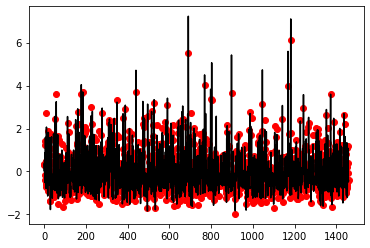

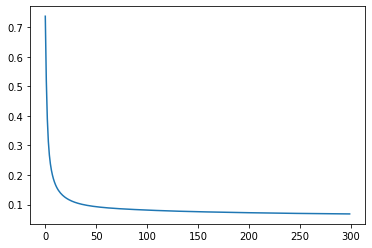

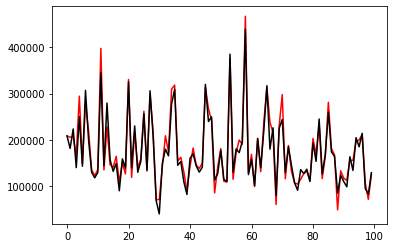

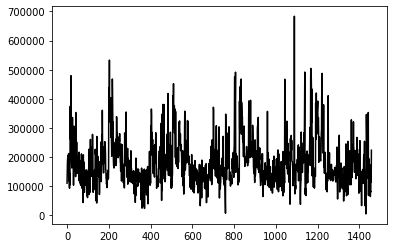

In [32]:
train_and_test()